
# Imports

In [1]:
########################## EDA
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from wordcloud import WordCloud

########################## Preprecessing
import spacy
import time
from tqdm import tqdm_notebook as tqdm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

########################## Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes  import MultinomialNB
from sklearn.naive_bayes  import BernoulliNB
from sklearn.ensemble     import RandomForestClassifier
from xgboost              import XGBClassifier

########################## Machine Learning Evaluation
from sklearn.metrics         import accuracy_score, f1_score
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score


pd.set_option('max_colwidth', None)

# Read data

In [2]:
df = pd.read_csv("imdb.csv")
df = df.sample(10000)
df_train = df.sample(frac = 0.8)
  
df_valid = df.drop(df_train.index)

print(f"Number of documents in training data:  {len(df_train)}")   #formatowanie 2 typy 
print("Number of documents in validation data: %d" % len(df_valid))

Number of documents in training data:  8000
Number of documents in validation data: 2000


In [3]:
df_train['review']

ind this movie, being the huge elvis fan that i am, and i found it to be a huge disappointment. kurt russel had most of the "elvis moves" down and the voice imitation was great, but the dubbed in singing voice of elvis just didnt work for me. the voice didnt always match up with russels mouth, and it was hard for me to get lost in the plot because it bothered me that it was noticeable. also, there were so many freaking discrepancies in the film, people who dont know much about elvis would probably think them to be facts. songs are sung by him earlier than he recorded them in real life, the time when he got his first guitar is wrong, im pretty sure his brother jesse garron was buried in an unmarked grave, not one with a huge headstone reading JESSE GARRON. i know it was just a tv movie, but they skipped over important events, like the come-back-special, and dragged some scenes out for way too long. if you want to see a good movie that shows elvis in his prime rent THATS THE WAY IT IS, o

# EDA
### Target

C:\Users\Wojtek\anaconda3\envs\dl\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

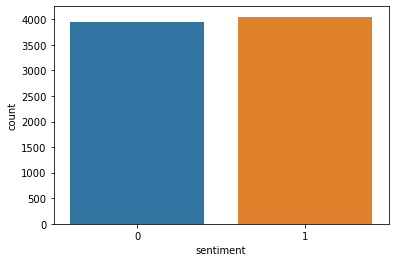

In [4]:
sb.countplot(df_train['sentiment'])

### Text

In [5]:
positive = df[df['sentiment']==0]['review']
negative = df[df['sentiment']==1]['review']

positive

ned, I love the scene where Ratso and Joe are arguing in their apartment when Ratso says to Joe that his cowboy outfit only attracts homosexuals and Joe says in self-defense "John Wayne! You gonna tell me he's a fag!" What I like is the delivery in that scene.  I would say that even though MIDNIGHT COWBOY was set in the late '60's, much of it rings true today. That's because although the area around 42nd Street in New York has been cleaned up in the form of Disneyfication in the last several years, homelessness is still just as prevalent there now as it was 40 years ago. Also, many people have unrealistic dreams of how they are going to strike it big only to have their dreams smashed as was the case with the Jon Voight character. One thing that impresses me about Jon Voight's character is how he is a survivor and I felt that at the end of the movie, he had matured a great deal and that Ratso (Dustin Hoffman's character) was a good influence on him.  In conclusion, I want to say that I 

Wall time: 10.1 s


Text(0.5, 1.0, 'Negative')

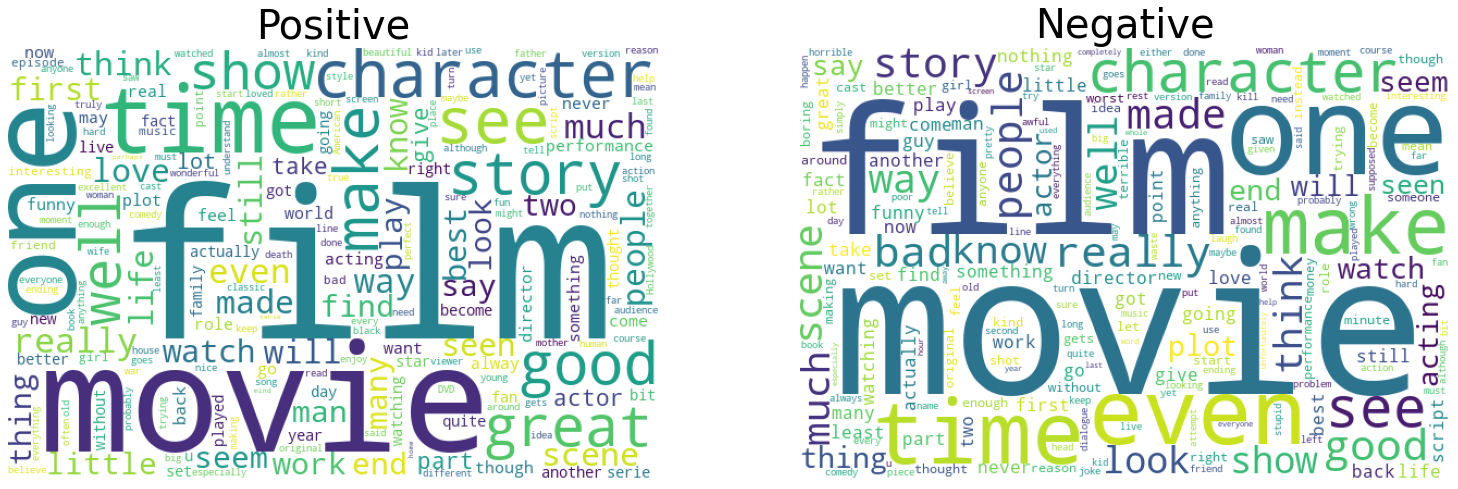

In [6]:
%%time
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])

wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(positive))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Positive', fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(negative))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Negative',fontsize=40);

# NLP Preprocessing

Before we start with any NLP project we need to pre-process the data to get it all in a consistent format.We need to clean, tokenize and convert our data into a matrix. Some of the basic text pre-processing techniques includes:

- Make text all **lower case** or **upper case** so that the algorithm does not treat the same words in different cases as different
- **Removing Noise** i.e everything that isn’t in a standard number or letter i.e Punctuation, Numerical values, common non-sensical text (/n)
- **Tokenization**: Tokenization is just the term used to describe the process of converting the normal text strings into a list of tokens i.e words that we actually want. Sentence tokenizer can be used to find the list of sentences and Word tokenizer can be used to find the list of words in strings.
- **Stopword Removal**: Sometimes, some extremely common words which would appear to be of little value in helping select documents matching a user need are excluded from the vocabulary entirely. These words are called stop words

### More data cleaning steps after tokenization:
- **Stemming**: Stemming is the process of reducing inflected (or sometimes derived) words to their stem, base or root form — generally a written word form. Example if we were to stem the following words: “Stems”, “Stemming”, “Stemmed”, “and Stemtization”, the result would be a single word “stem”.
- **Lemmatization**: A slight variant of stemming is lemmatization. The major difference between these is, that, stemming can often create non-existent words, whereas lemmas are actual words. So, your root stem, meaning the word you end up with, is not something you can just look up in a dictionary, but you can look up a lemma. Examples of Lemmatization are that “run” is a base form for words like “running” or “ran” or that the word “better” and “good” are in the same lemma so they are considered the same.
- **Parts of speech** tagging
- Create **bi-grams** or tri-grams And more...

However, it is not necessary that you would need to use all these steps. The usage depends on your problem at hand. Sometimes removal of stop words helps while at other times, this might not help.Here is a nice table taken from the blog titled: [All you need to know about Text Preprocessing for Machine Learning & NLP](https://kavita-ganesan.com/text-preprocessing-tutorial) that summarizes how much preprocessing you should be performing on your text data:

# <center> Toy Example

In [7]:
texts = [
    'Hello this is an sentence',
    'Hello this is another sentence',
    'Hello Hello Hello, this is mellow'
]

### Bag Of Words (BOW)

In [8]:
# create a CountVectorizer instance
# fit tranform the text with it
# get the features+
from sklearn.feature_extraction.text import CountVectorizer

vectoriser = CountVectorizer()
texts_bow = vectoriser.fit_transform(texts)

tokens = vectoriser.get_feature_names()
pd.DataFrame(data=texts_bow.toarray(), index=['Text 1', 'Text 2', "Text 3"], columns=tokens)

,an,another,hello,is,mellow,sentence,this
Text 1,1,0,1,1,0,1,1
Text 2,0,1,1,1,0,1,1
Text 3,0,0,3,1,1,0,1


### Bag Of Words (BOW) + ngram

In [9]:
#do the same approach but using a range in the count vectorizer
vectoriser = CountVectorizer(ngram_range = (2,3))
texts_bow = vectoriser.fit_transform(texts)
tokens = vectoriser.get_feature_names()
pd.DataFrame(data=texts_bow.toarray(), index=['Text 1', 'Text 2', "Text 3"], columns=tokens)


,an sentence,another sentence,hello hello,hello hello hello,hello hello this,hello this,hello this is,is an,is an sentence,is another,is another sentence,is mellow,this is,this is an,this is another,this is mellow
Text 1,1,0,0,0,0,1,1,1,1,0,0,0,1,1,0,0
Text 2,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0
Text 3,0,0,2,1,1,1,1,0,0,0,0,1,1,0,0,1


### TFIDF
A problem with the Bag of Words approach is that highly frequent words start to dominate in the document (e.g. larger score), but may not contain as much “informational content”. Also, it will give more weight to longer documents than shorter documents.

One approach is to rescale the frequency of words by how often they appear in all documents so that the scores for frequent words like “the” that are also frequent across all documents are penalized. This approach to scoring is called Term Frequency-Inverse Document Frequency, or TF-IDF for short, where:

- **Term Frequency**: is a scoring of the frequency of the word in the current document.
- **Inverse Document Frequency**: is a scoring of how rare the word is across documents.

In [10]:
#Same approach for the TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectoriser = TfidfVectorizer()
texts_tfidf = vectoriser.fit_transform(texts)
tokens = vectoriser.get_feature_names()
print(texts)
pd.DataFrame(data=texts_tfidf.toarray(), index=['Text 1', 'Text 2', "Text 3"], columns=tokens)


['Hello this is an sentence', 'Hello this is another sentence', 'Hello Hello Hello, this is mellow']


,an,another,hello,is,mellow,sentence,this
Text 1,0.617227,0.000000,0.364544,0.364544,0.000000,0.469417,0.364544
Text 2,0.000000,0.617227,0.364544,0.364544,0.000000,0.469417,0.364544
Text 3,0.000000,0.000000,0.805627,0.268542,0.454682,0.000000,0.268542


TERM FREQUENCY TF:


In [11]:
vectoriser = TfidfVectorizer(use_idf = False)
texts_tfidf = vectoriser.fit_transform(texts)
tokens = vectoriser.get_feature_names()
print(texts)
pd.DataFrame(data=texts_tfidf.toarray(), index=['Text 1', 'Text 2', "Text 3"], columns=tokens)


['Hello this is an sentence', 'Hello this is another sentence', 'Hello Hello Hello, this is mellow']


,an,another,hello,is,mellow,sentence,this
Text 1,0.447214,0.000000,0.447214,0.447214,0.000000,0.447214,0.447214
Text 2,0.000000,0.447214,0.447214,0.447214,0.000000,0.447214,0.447214
Text 3,0.000000,0.000000,0.866025,0.288675,0.288675,0.000000,0.288675


# <center> Apply to the reviews

### Bag Of Words 1-gram

In [25]:
%%time
bow_1gram = CountVectorizer()
train_bow_1gram = bow_1gram.fit_transform(df_train['review'])
valid_bow_1gram = bow_1gram.transform(df_valid['review'])


Wall time: 1.95 s


### Bag Of Words 1-2-grams

In [26]:
%%time
bow_2grams = CountVectorizer(ngram_range=(1, 2))
train_bow_2grams = bow_2grams.fit_transform(df_train['review'])
valid_bow_2grams = bow_2grams.transform(df_valid['review'])

Wall time: 6.1 s


### TFIDF 1-gram

In [27]:
%%time
tfidf_1gram       = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 1))
train_tfidf_1gram = tfidf_1gram.fit_transform(df_train['review'])
valid_tfidf_1gram = tfidf_1gram.transform(df_valid['review'])






Wall time: 1.76 s


### TFIDF 1-2-grams

In [30]:
%%time
tfidf_2grams      = TfidfVectorizer( min_df=2, max_df=0.5, ngram_range=(1, 2))
train_tfidf_2grams = tfidf_2grams.fit_transform(df_train['review'])
valid_tfidf_2grams = tfidf_2grams.transform(df_valid['review'])



Wall time: 4.8 s


In [31]:
data = [
    ("BOW 1gram",   train_bow_1gram, valid_bow_1gram),
    ("BOW 2grams",  train_bow_2grams, valid_bow_2grams),
    ("TFIDF 1gram", train_tfidf_1gram, valid_tfidf_1gram),
    ("TFIDF 2grams",train_tfidf_2grams, valid_tfidf_2grams)
]

print("BOW 1gram   ", train_bow_1gram.shape)
print("BOW 2grams  ", train_bow_2grams.shape)
print("TFIDF 1gram ", train_tfidf_1gram.shape)
print("TFIDF 2grams", train_tfidf_2grams.shape)

BOW 1gram    (8000, 47209)
BOW 2grams   (8000, 668318)
TFIDF 1gram  (8000, 27437)
TFIDF 2grams (8000, 176242)


# <center> ML Models

## Naive Bayes (<1 s)

In [36]:
y_train = df_train['sentiment']
y_valid = df_valid['sentiment']


(8000,)

In [45]:

for name, x_train, x_valid in data: 
    model = MultinomialNB()
    start_time = time.time()
    model.fit(x_train, y_train)
    t = time.time() - start_time
    a = accuracy_score(y_valid, model.predict(x_valid))
    print(name, "\tAccuracy:\t", a, "\tTime:\t", t)
  

    

BOW 1gram 	Accuracy:	 0.826 	Time:	 0.008003473281860352
BOW 2grams 	Accuracy:	 0.854 	Time:	 0.05884289741516113
TFIDF 1gram 	Accuracy:	 0.8435 	Time:	 0.006005764007568359
TFIDF 2grams 	Accuracy:	 0.8545 	Time:	 0.021918773651123047


## Logistic Regression (30s)

In [65]:

for name, x_train, x_valid in data:
    model = LogisticRegression(n_jobs = -1)# -1 memans use all CPU cores
    start_time = time.time()
    model.fit(x_train, y_train)
    t = time.time() - start_time
    a = accuracy_score(y_valid, model.predict(x_valid))
    print(name, "\tAccuracy:\t", a, "\tTime:\t", t)

BOW 1gram 	Accuracy:	 0.8605 	Time:	 2.0043845176696777
BOW 2grams 	Accuracy:	 0.8805 	Time:	 12.382716655731201
TFIDF 1gram 	Accuracy:	 0.877 	Time:	 1.402395248413086
TFIDF 2grams 	Accuracy:	 0.8815 	Time:	 1.7543275356292725


wojtek jest geniuszem
0.0


## Random Forest (10+90+6+22 segundos)

In [67]:
for name, x_train, x_valid in data:
    model =RandomForestClassifier(n_jobs=-1)
    start_time = time.time()
    model.fit(x_train, y_train)
    t = time.time() - start_time
    a = accuracy_score(y_valid, model.predict(x_valid))
    print(name, "\tAccuracy:\t", a, "\tTime:\t", t)

BOW 1gram 	Accuracy:	 0.836 	Time:	 2.432990312576294
BOW 2grams 	Accuracy:	 0.832 	Time:	 13.619347095489502
TFIDF 1gram 	Accuracy:	 0.8245 	Time:	 1.9438002109527588
TFIDF 2grams 	Accuracy:	 0.8245 	Time:	 4.995633602142334
